In [2]:
cd ..

/Users/estevao.uyra/dev/personal/criticality-on-neural-network


In [3]:
import sys
sys.path.append("./src")


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline
plt.rcParams['figure.dpi'] = 200

# Examples of matrices

## Fully connected network

In [4]:
from connectivity import fully_connected_network

In [5]:
def plot_three_conn(func, s_mult=1, l_mult=1, **kwargs):
    fig, ax = plt.subplots(2, 3, figsize=(16, 8), dpi=100)
    for i in range(3):
        W = func(**kwargs)
        sns.heatmap(W, ax=ax[1,i])
        plot_circle(W, s_mult=s_mult, l_mult=l_mult, ax=ax[0,i])
    
def plot_circle(W, s_mult=1, l_mult=1, ax=None, place_random=False):
    if ax is None:
        ax = plt.gca()
    plt.sca(ax)
    
    i = np.arange(W.shape[0])
    
    if place_random == False:
        x = np.sin(2*np.pi*i/i.max())
        y = np.cos(2*np.pi*i/i.max())
    else:
        x = np.random.rand(W.shape[0])
        y = np.random.rand(W.shape[0])
        
    plt.scatter(x, y, s= W.sum(axis=1)*s_mult, color='k')
    
    for i_to, i_from in np.vstack(np.nonzero(W)).T:
        from_xy = (x[i_from], y[i_from])
        dxy = (x[i_to] - x[i_from], y[i_to] - y[i_from])
        plt.arrow(*from_xy, *dxy, linewidth=np.abs(W[i_to, i_from])*l_mult, color='r' if W[i_to, i_from] < 0 else 'k')
    ax.axis('off')

/usr/local/anaconda3/envs/criticality-on-neural-network/lib/python3.7/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


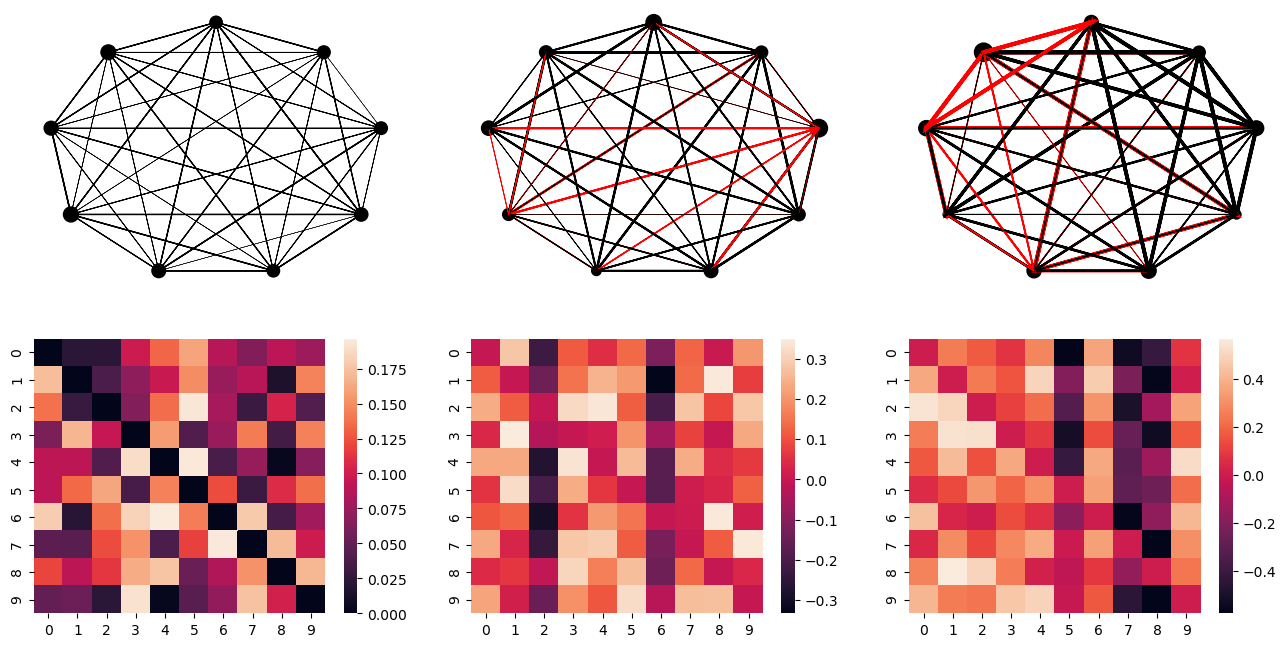

In [6]:
plot_three_conn(fully_connected_network, n=10, proportion_inhib=.2,
               s_mult=100, l_mult=5)

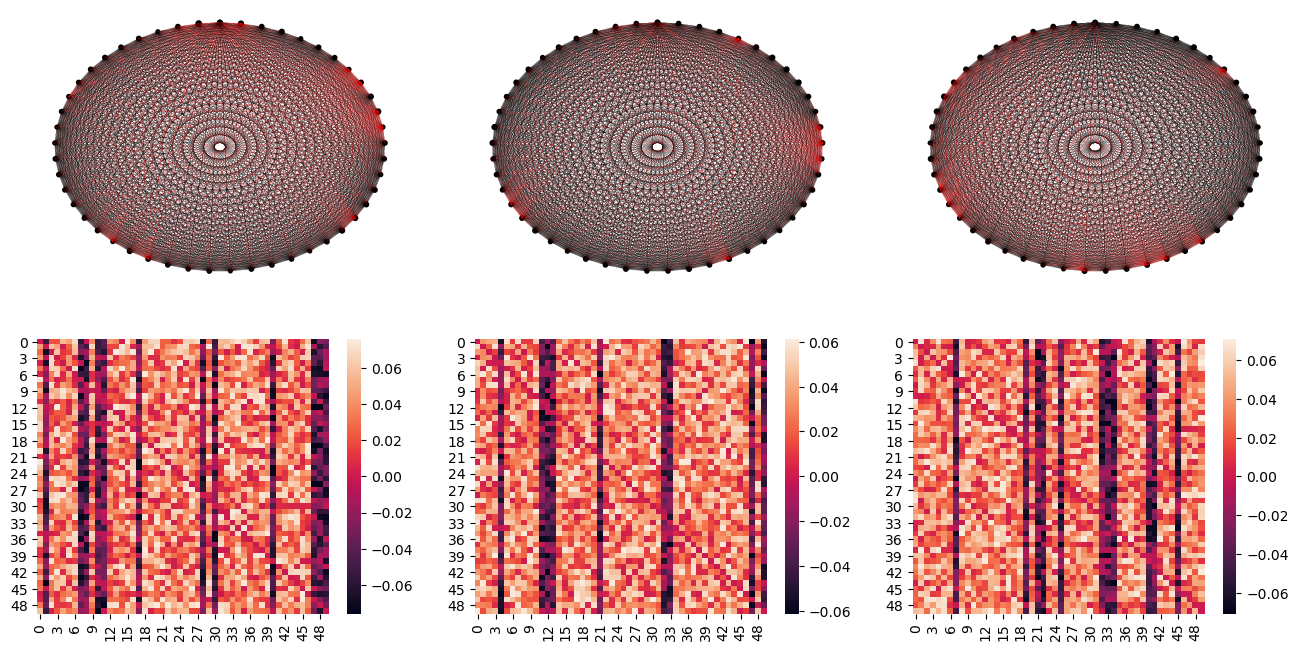

In [7]:
plot_three_conn(fully_connected_network, n=50, proportion_inhib=.2,
                s_mult=10, l_mult=.0001)

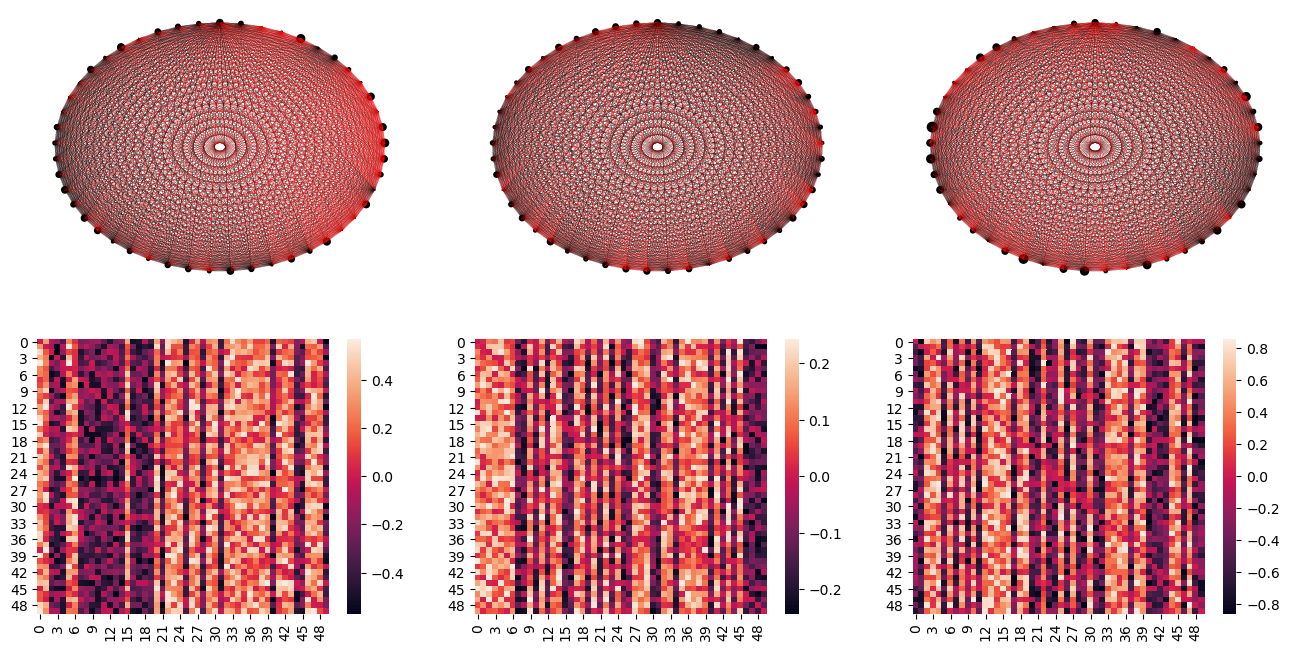

In [8]:
plot_three_conn(fully_connected_network, n=50, proportion_inhib=.49,
                s_mult=10, l_mult=.0001)

## Square lattice network

In [9]:
from connectivity import square_lattice_network

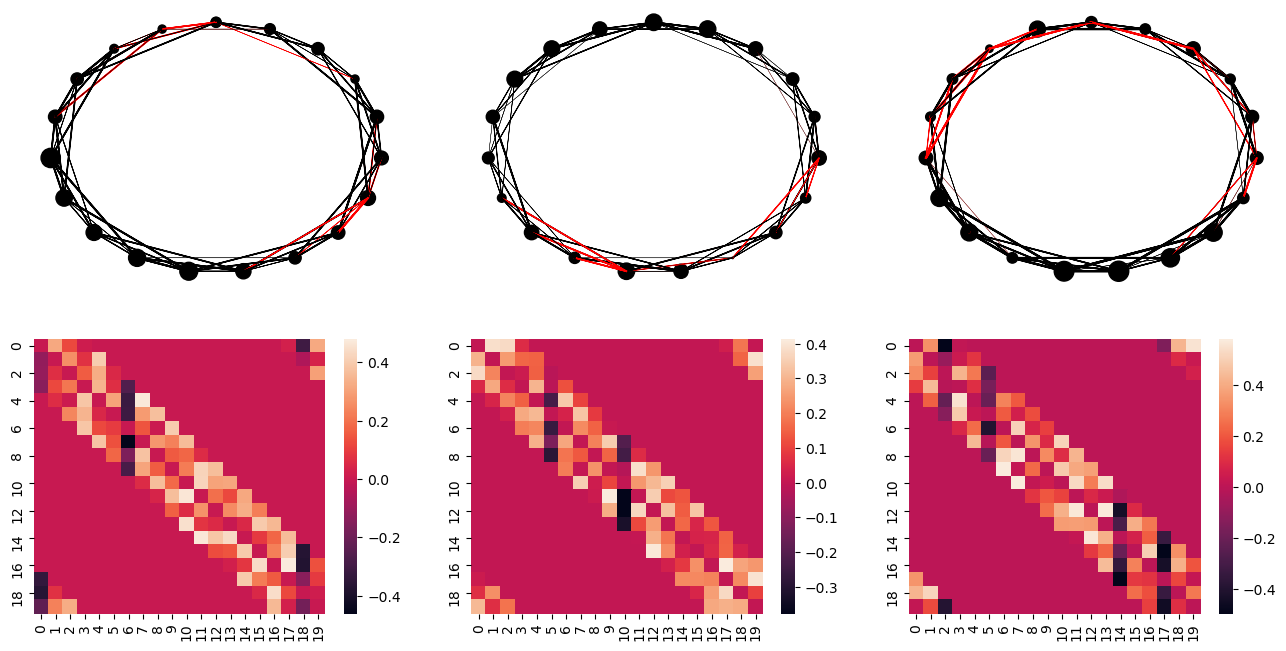

In [10]:
plot_three_conn(square_lattice_network, n=20, k=6, proportion_inhib=.2,
                s_mult=100, l_mult=3)

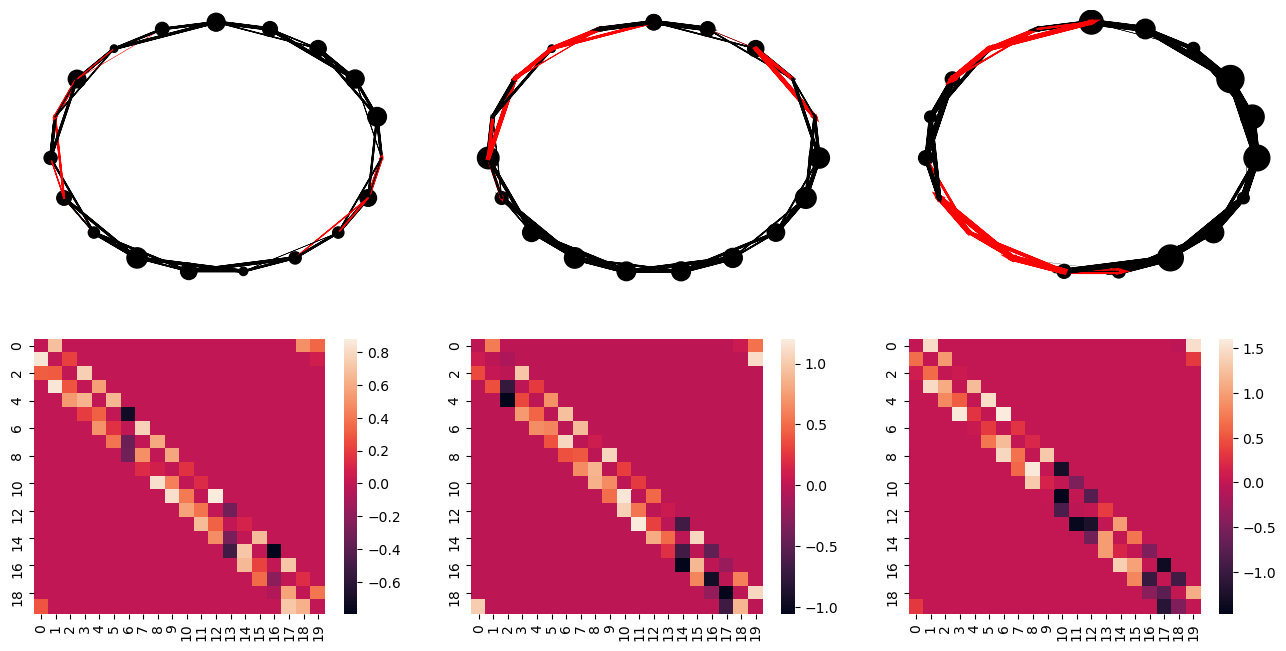

In [11]:
plot_three_conn(square_lattice_network, n=20, k=3, proportion_inhib=.2,
                s_mult=100, l_mult=3)

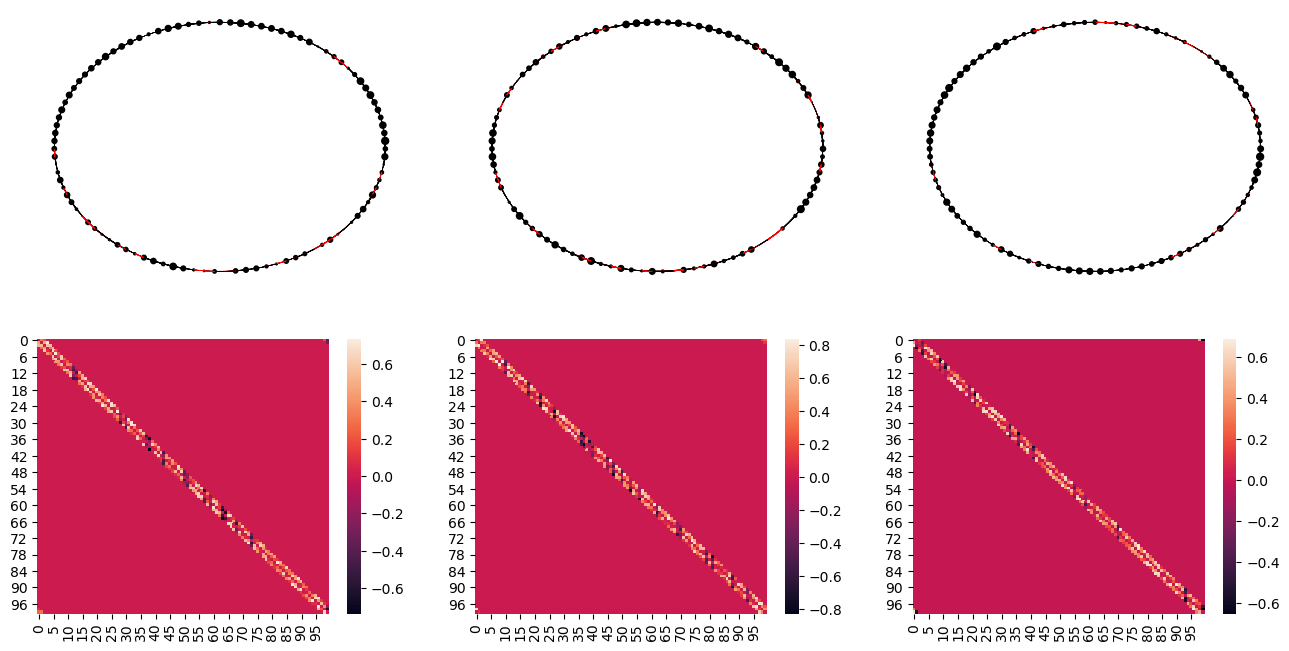

In [12]:
plot_three_conn(square_lattice_network, n=100, k=4, proportion_inhib=.2,
                s_mult=10, l_mult=1)

## Small world network

In [13]:
from connectivity import small_world_network

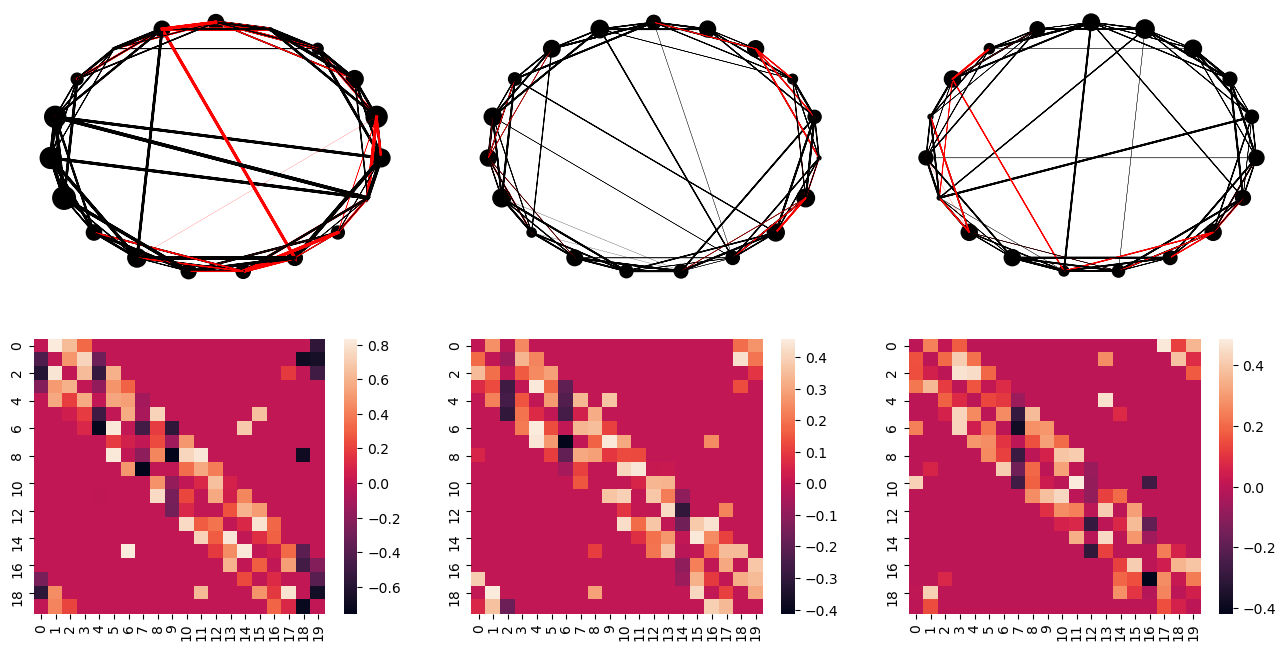

In [14]:
plot_three_conn(small_world_network, n=20, k=6, r=.1, proportion_inhib=.2,
                s_mult=100, l_mult=3)

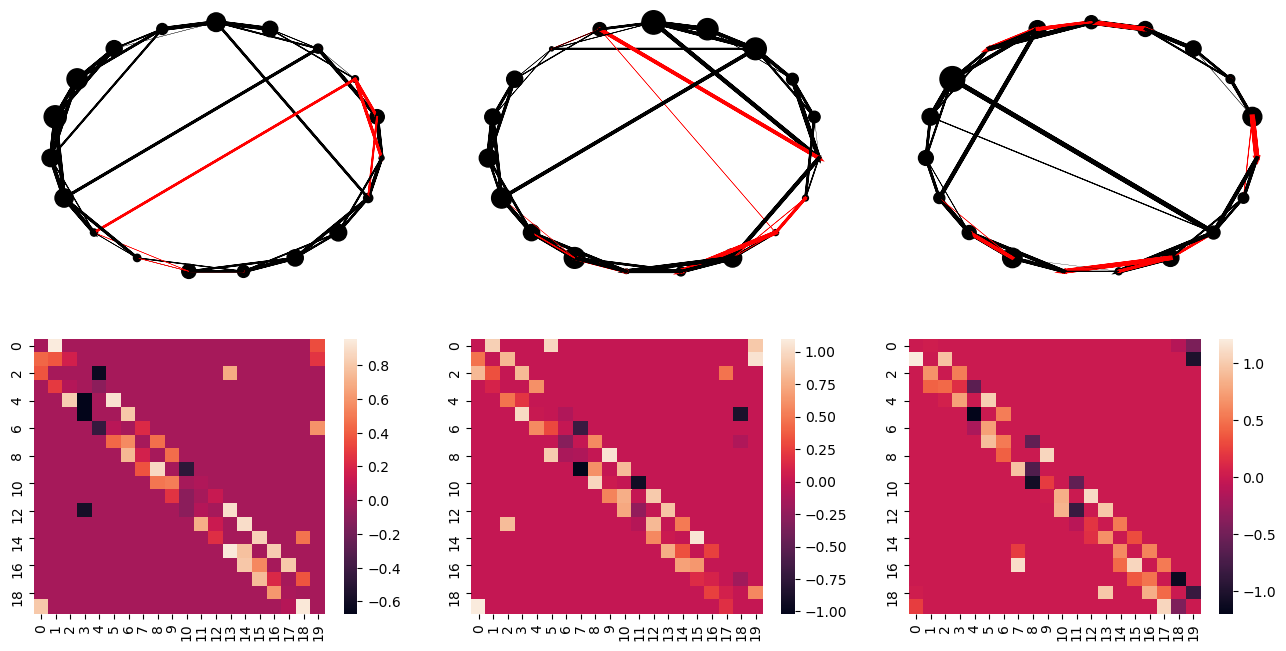

In [15]:
plot_three_conn(small_world_network, n=20, k=3, r=.1, proportion_inhib=.2,
                s_mult=100, l_mult=3)

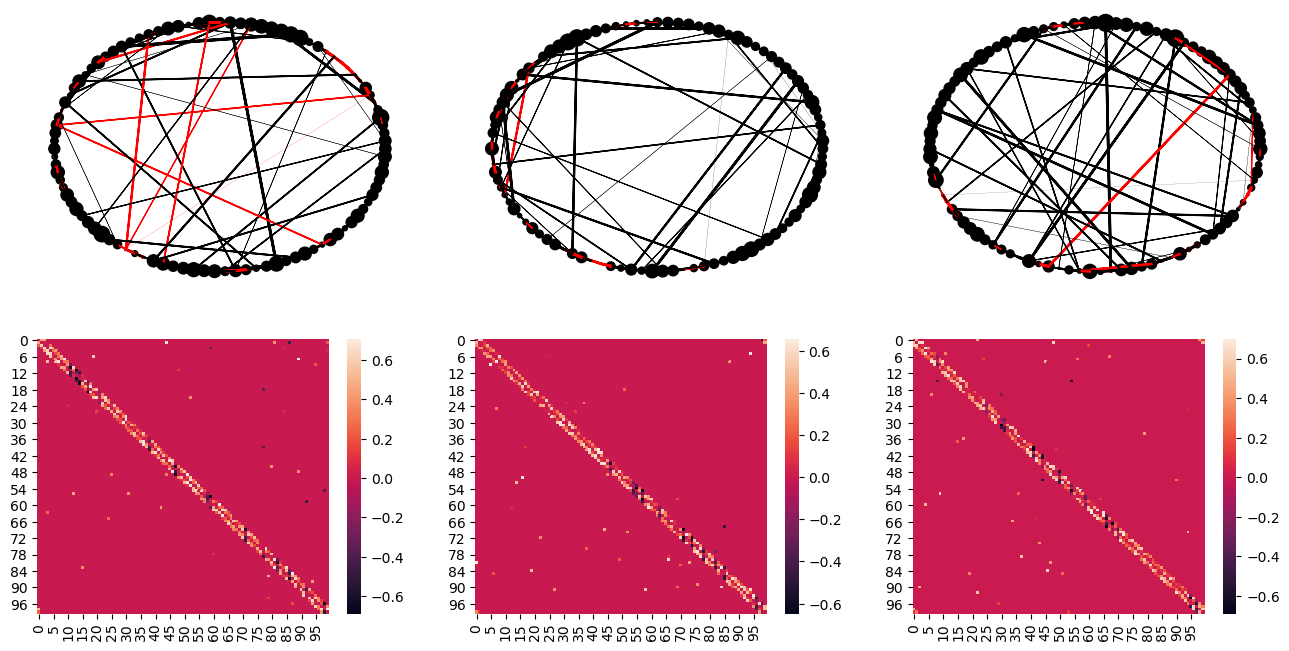

In [16]:
plot_three_conn(small_world_network, n=100, k=4, r=.1, proportion_inhib=.2,
                s_mult=50, l_mult=3)

## Scale-free

In [17]:
from connectivity import neuron_scale_free_network

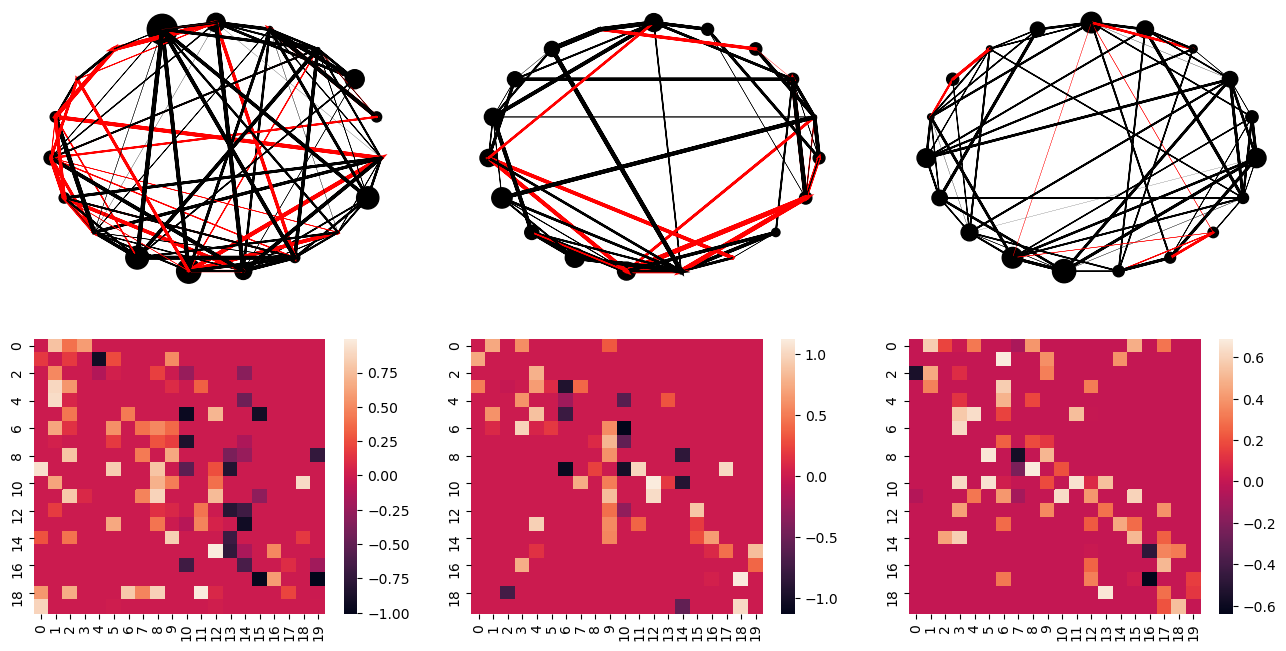

In [18]:
plot_three_conn(neuron_scale_free_network, n=20, k_out_max=10, proportion_inhib=.2,
                s_mult=100, l_mult=3)

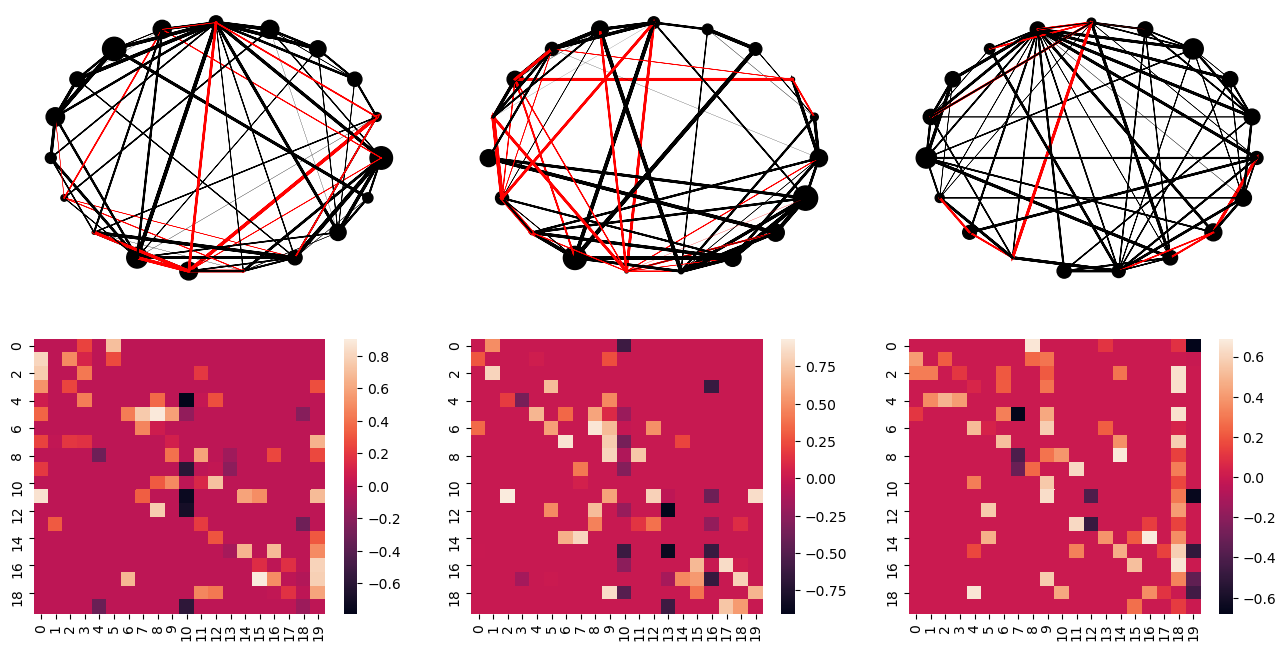

In [19]:
plot_three_conn(neuron_scale_free_network, n=20, k_out_max=20, proportion_inhib=.2,
                s_mult=100, l_mult=3)

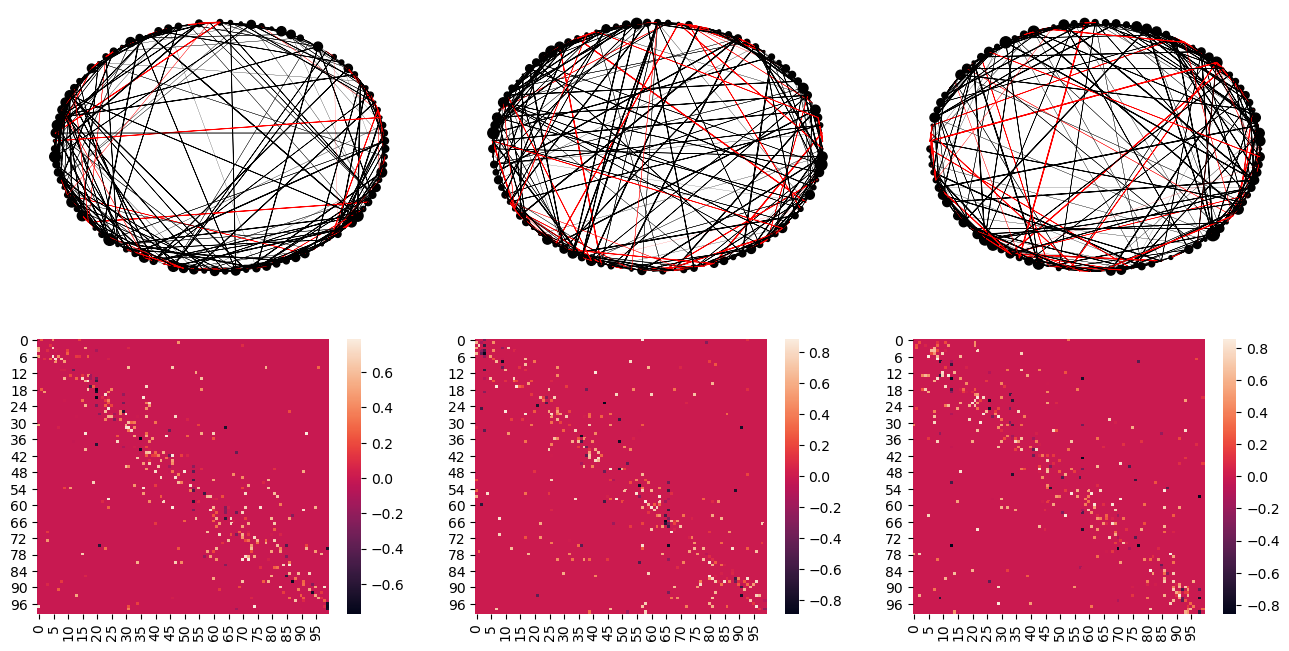

In [20]:
plot_three_conn(neuron_scale_free_network, n=100, k_out_max=10, proportion_inhib=.2,
                s_mult=20, l_mult=1)

# Networks 

In [16]:
# Import packages for data cleaning
import numpy as np
import pandas as pd
import re # For finding specific strings in the text
# Import packages for data visualization
import plotly.offline as py
import plotly.graph_objects as go
import networkx as nx

In [17]:
W = neuron_scale_free_network(1000, 50, .2)
G = nx.from_numpy_matrix(W, create_using=nx.DiGraph)
pos_ = nx.spring_layout(G)

ws = np.abs(W.sum(axis=0))
for i in range(len(ws)):
    G.nodes()[i]['size'] = ws[i]
    
G.nodes()[0]['size'] = 1

def make_edge(x, y, text, width):
    return  go.Scatter(x         = x,
                       y         = y,
                       line      = dict(width = width,
                                   color = 'cornflowerblue'),
                       hoverinfo = 'text',
                       text      = ([text]),
                       mode      = 'lines')

edge_trace = []
for edge in G.edges():
    
    if G.edges()[edge]['weight'] > 0:
        char_1 = edge[0]
        char_2 = edge[1]
        x0, y0 = pos_[char_1]
        x1, y1 = pos_[char_2]
#         text   = char_1 + '--' + char_2 + ': ' + str(G.edges()[edge]['weight'])
        
        trace  = make_edge([x0, x1, None], [y0, y1, None], '', 
                           width = 0.3*G.edges()[edge]['weight']**1.75)
        edge_trace.append(trace)
        
# Make a node trace
node_trace = go.Scatter(x         = [],
                        y         = [],
                        text      = [],
                        textposition = "top center",
                        textfont_size = 10,
                        mode      = 'markers+text',
                        hoverinfo = 'none',
                        marker    = dict(color = [],
                                         size  = [],
                                         line  = None))
# For each node in midsummer, get the position and size and add to the node_trace
for node in G.nodes():
    x, y = pos_[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_trace['marker']['color'] += tuple(['cornflowerblue'])
    node_trace['marker']['size'] += tuple([5*G.nodes()[node]['size']])
    
# Customize layout
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)', # transparent background
    plot_bgcolor='rgba(0,0,0,0)', # transparent 2nd background
    xaxis =  {'showgrid': False, 'zeroline': False}, # no gridlines
    yaxis = {'showgrid': False, 'zeroline': False}, # no gridlines
)
# Create figure
fig = go.Figure(layout = layout)
# Add all edge traces
for trace in edge_trace:
    fig.add_trace(trace)
# Add node trace
fig.add_trace(node_trace)
# Remove legend
fig.update_layout(showlegend = False)
# Remove tick labels
fig.update_xaxes(showticklabels = False)
fig.update_yaxes(showticklabels = False)
# Show figure
fig.show()

# The code inside

In [ ]:
import numpy as np

In [ ]:
np.random.choice(p=.2)

In [ ]:
list(zip(np.nonzero(W)))

In [ ]:
len(out_index)

In [ ]:
len(out_index)

In [ ]:
W = square_lattice_network(5, 2, .2)
out_index, in_index = np.nonzero(W)
rewire_index = np.random.choice(len(out_index), round(p*len(out_index)), replace=False)

out_rewire, in_rewire = out_index[rewire_index], in_index[rewire_index]
connection_values = W[(out_rewire, in_rewire)]
W[(out_rewire, in_rewire)] = 0
W[(np.random.choice(n, len(out_rewire)), in_rewire)] = connection_values

In [ ]:
W

In [ ]:
out = 

In [ ]:
W[np.nonzero(W)]